In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pickle
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu

sys.path.append('modules')
from utils_data import load_data,scale_props,get_graphs, plot_property_histograms, compare_distributions

Loading data from file
File not found, reading from SDF files
Reading OPERA_Data/VP_QR.sdf


  0%|          | 0/2819 [00:00<?, ?it/s]

100%|██████████| 2819/2819 [00:00<00:00, 6985.56it/s]


Reading OPERA_Data/LogP_QR.sdf


  0%|          | 0/13963 [00:00<?, ?it/s][17:09:40] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[17:09:40] ERROR: Could not sanitize molecule ending on line 38202
[17:09:40] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 13963/13963 [00:02<00:00, 5426.17it/s]


Reading OPERA_Data/AOH_QR.sdf


100%|██████████| 692/692 [00:00<00:00, 10089.19it/s]


Reading OPERA_Data/BCF_QR.sdf


  0%|          | 0/626 [00:00<?, ?it/s][17:09:42] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[17:09:42] ERROR: Could not sanitize molecule ending on line 5019
[17:09:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 626/626 [00:00<00:00, 6207.83it/s]


Reading OPERA_Data/Biodeg_QR.sdf


100%|██████████| 150/150 [00:00<00:00, 5739.33it/s]


Reading OPERA_Data/BP_QR.sdf


100%|██████████| 5434/5434 [00:00<00:00, 8500.74it/s]


Reading OPERA_Data/Clint_QR.sdf


100%|██████████| 551/551 [00:00<00:00, 4671.07it/s]


Reading OPERA_Data/FU_QR.sdf


100%|██████████| 1613/1613 [00:00<00:00, 4019.20it/s]


Reading OPERA_Data/HL_QR.sdf


100%|██████████| 697/697 [00:00<00:00, 7332.46it/s]


Reading OPERA_Data/KM_QR.sdf


100%|██████████| 541/541 [00:00<00:00, 5982.92it/s]


Reading OPERA_Data/KOA_QR.sdf


100%|██████████| 270/270 [00:00<00:00, 7192.70it/s]


Reading OPERA_Data/KOC_QR.sdf


100%|██████████| 728/728 [00:00<00:00, 5951.14it/s]


Reading OPERA_Data/MP_QR.sdf


  8%|▊         | 673/8698 [00:00<00:01, 6719.13it/s][17:09:44] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
[17:09:44] ERROR: Could not sanitize molecule ending on line 52970
[17:09:44] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 12 22 23 24 25 26 27
100%|██████████| 8698/8698 [00:01<00:00, 6345.32it/s]


Reading OPERA_Data/WS_QR.sdf


100%|██████████| 5269/5269 [00:00<00:00, 5793.49it/s]


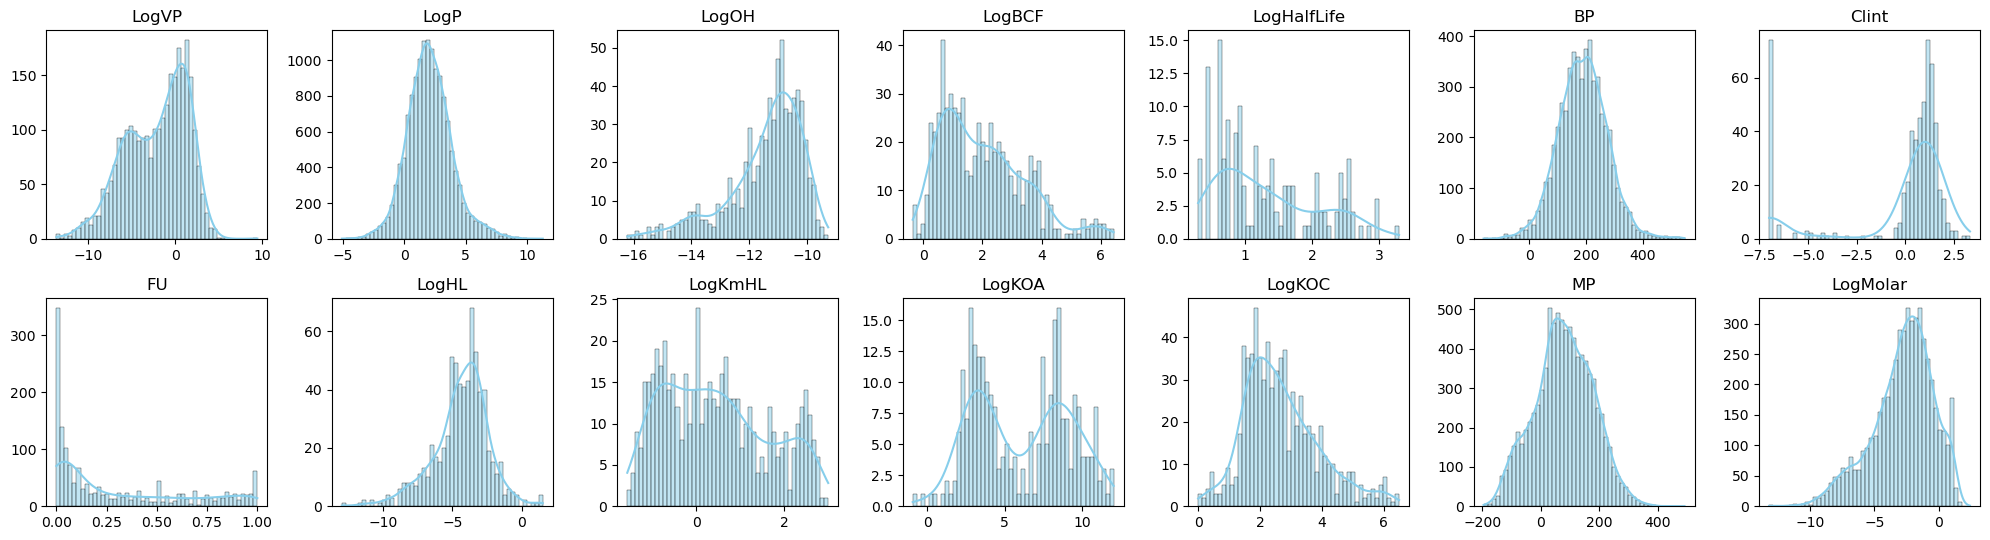

In [2]:
# Load the data
df_combined = load_data()
df_combined

# Plot the histograms of the properties
plot_property_histograms(df_combined)

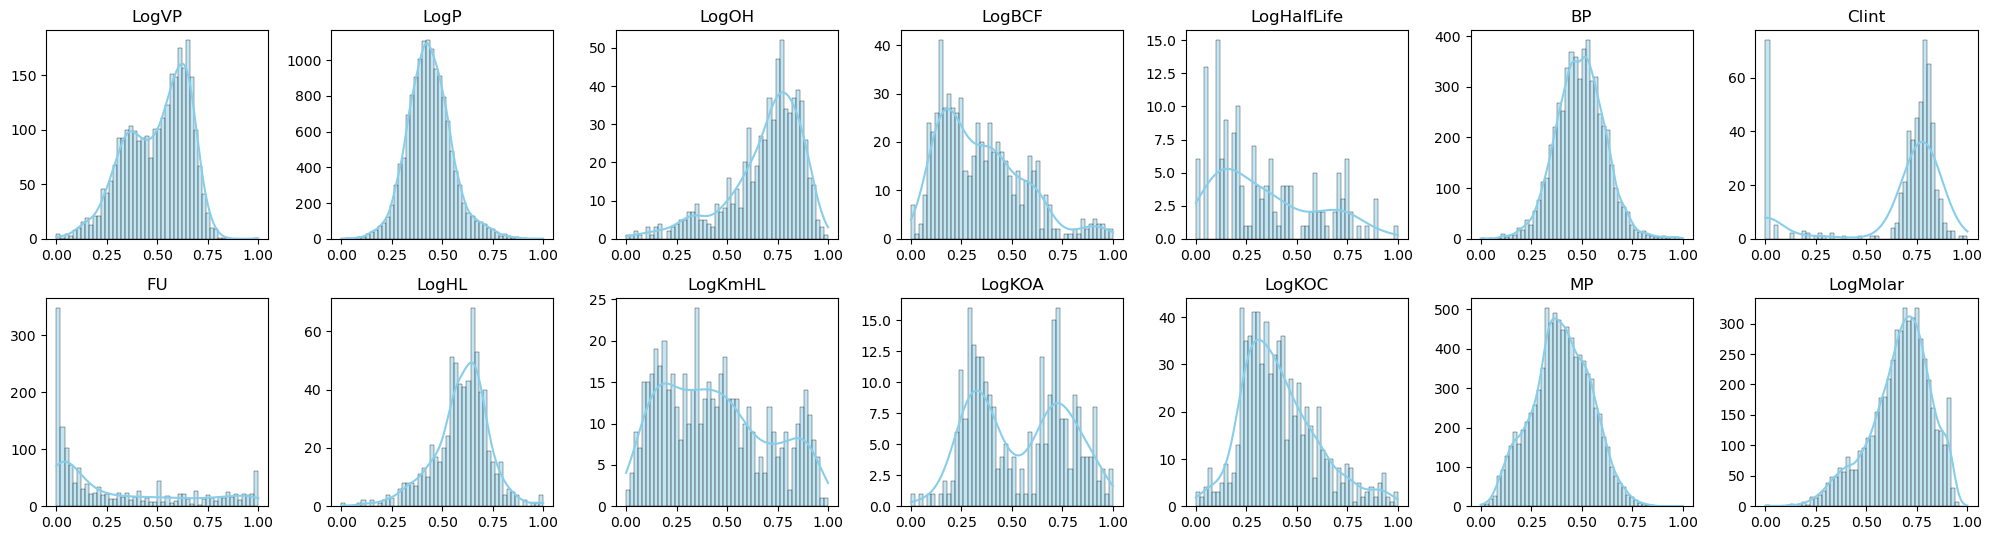

In [3]:
#so quite different ranges, we can scale this to be between 0 and 1
df_scaled,scaler = scale_props(df_combined)

#save scaler for later use as pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
plot_property_histograms(df_scaled)

In [4]:
#split check: if we do a random split 80/20, do we also get a 80/20 split for each property?
train, test = train_test_split(df_scaled, test_size=0.2, random_state=42)
for col in df_scaled.columns[1:]:
    print(f'{col}: {test[col].count()/df_scaled[col].count()}')

LogVP: 0.21598579040852575
LogP: 0.20183552018355203
LogOH: 0.24132947976878613
LogBCF: 0.1762820512820513
LogHalfLife: 0.24666666666666667
BP: 0.21295785017485735
Clint: 0.1813186813186813
FU: 0.18629283489096574
LogHL: 0.21377331420373027
LogKmHL: 0.1922365988909427
LogKOA: 0.2074074074074074
LogKOC: 0.21023513139695713
MP: 0.20134228187919462
LogMolar: 0.19919478527607362


LogVP: MannwhitneyuResult(statistic=653159.5, pvalue=0.31668653496008226)
LogP: MannwhitneyuResult(statistic=15763058.0, pvalue=0.6195014824778076)
LogOH: MannwhitneyuResult(statistic=43675.0, pvalue=0.9426059165069719)
LogBCF: MannwhitneyuResult(statistic=29074.5, pvalue=0.6394069864890037)
LogHalfLife: MannwhitneyuResult(statistic=1868.5, pvalue=0.33363017346611834)
BP: MannwhitneyuResult(statistic=2440982.5, pvalue=0.48987522700458896)
Clint: MannwhitneyuResult(statistic=22770.0, pvalue=0.6503379893568134)
FU: MannwhitneyuResult(statistic=200757.0, pvalue=0.44591948927821956)
LogHL: MannwhitneyuResult(statistic=40943.5, pvalue=0.9571847906634039)
LogKmHL: MannwhitneyuResult(statistic=24510.5, pvalue=0.21255245604519624)
LogKOA: MannwhitneyuResult(statistic=5950.5, pvalue=0.9371821073625608)
LogKOC: MannwhitneyuResult(statistic=42605.0, pvalue=0.72975230295574)
MP: MannwhitneyuResult(statistic=6049215.5, pvalue=0.6325053313493219)
LogMolar: MannwhitneyuResult(statistic=2142209.5, pva

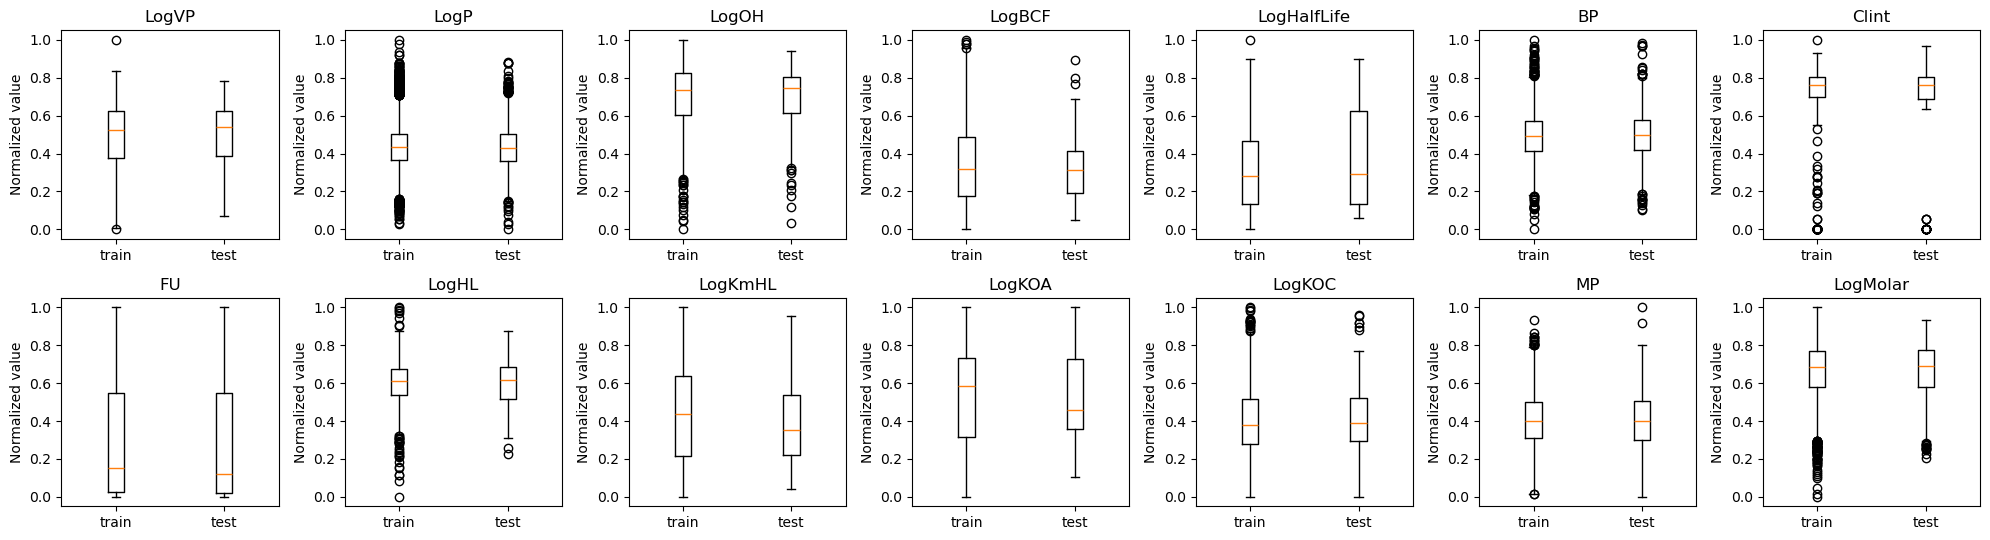

In [5]:
compare_distributions(df_scaled, train, test)

In [6]:
#Check if we really don't have dupliactes:
print(f'duplicated smiles: {df_scaled.SMILES.duplicated().sum()}')
#lets save these splits
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)
print(len(train),len(test))

duplicated smiles: 0
18582 4646


In [7]:
#get the exact same split of the unscaled data, df_combined
train_unscaled = df_combined[df_combined.SMILES.isin(train.SMILES)]
test_unscaled = df_combined[df_combined.SMILES.isin(test.SMILES)]
train_unscaled.to_csv('train_unscaled.csv',index=False)
test_unscaled.to_csv('test_unscaled.csv',index=False)

In [8]:
train_graphs_DASH_charge_scaled = get_graphs(train,dash_charges=True,scaled =True,save_graphs = True)
train_graphs_noDASH_charge_scaled = get_graphs(train,dash_charges=False,scaled =True,save_graphs = True)

Creating new graphs
Loading DASH tree data
Loaded 122 trees and data


100%|██████████| 18581/18581 [00:52<00:00, 351.30it/s]


18582 1 18581
Creating new graphs
Caution! 1 Mols dropped
